The dataset: Average daily temprature of different cities around globe from 1995 to 2020

    1: Importing our dataset
    2: Data Preprocessing
    3: Analysing global temperature from 1995 to 2019
    4: Comparing yearly average temperature of different regions over time
    5: Monthly average temperature in Canada

----

Importing modules

In [1]:
import pandas as pd

import numpy as np

import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

Load our dataset

In [12]:
data = pd.read_csv('dataset.csv')
data.head()

<ipython-input-12-607f3e8cf903>:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('dataset.csv')


,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9


The Dataset That we are going to work with is a ***Geo-Spatial Time-Series Dataset***

#### What is our dataset representing?
**Geo-Spatial**: Data represents that **Something** has happend **somewhere**! <br>
**Time-Series**: Data represents that **Something** has happend **at a specific time**! <br>
<br>
**Geo-Spatial Time-Series Dataset**: Data represents that **Something** has happend **somewhere** **at a specific time**!


### Time Series tasks:
    1- Overall Trend analysis
    2- Key Moments
    3- Outliers

## Preprocessing

#### Get only our needed columns

In [13]:
needed_columns = ["Region","Country","City","Month","Day","Year","AvgTemperature"]
data = data[needed_columns]
data.head()

,Region,Country,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,Algiers,1,1,1995,64.2
1,Africa,Algeria,Algiers,1,2,1995,49.4
2,Africa,Algeria,Algiers,1,3,1995,48.8
3,Africa,Algeria,Algiers,1,4,1995,46.4
4,Africa,Algeria,Algiers,1,5,1995,47.9


Convert fahrenheit to celsius

In [14]:
data["AvgTemperature"] = round((data["AvgTemperature"] -32) * 5/9,1)
data.head()

,Region,Country,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,Algiers,1,1,1995,17.9
1,Africa,Algeria,Algiers,1,2,1995,9.7
2,Africa,Algeria,Algiers,1,3,1995,9.3
3,Africa,Algeria,Algiers,1,4,1995,8.0
4,Africa,Algeria,Algiers,1,5,1995,8.8


Let's find the outliers

<Axes: >

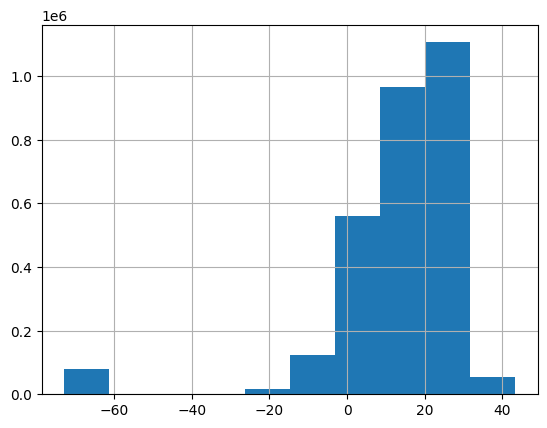

In [15]:
data["AvgTemperature"].hist()

Removing the outliers

<Axes: >

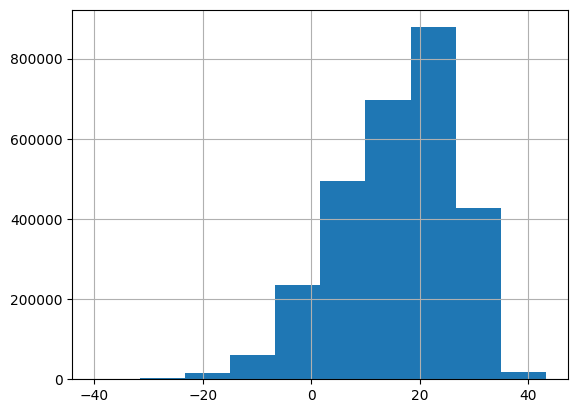

In [16]:
data = data[data["AvgTemperature"] > -40]
data["AvgTemperature"].hist()

sorting values by Year, Month and Day Column to see the time range of our data

In [18]:
data.sort_values(["Year","Month","Day"], inplace=True)
data

,Region,Country,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,Algiers,1,1,1995,17.9
13809,Africa,Benin,Cotonou,1,1,1995,27.3
23075,Africa,Central African Republic,Bangui,1,1,1995,24.1
32341,Africa,Congo,Brazzaville,1,1,1995,26.6
41606,Africa,Egypt,Cairo,1,1,1995,15.1
...,...,...,...,...,...,...,...
2862479,North America,US,Green Bay,5,13,2020,3.6
2871744,North America,US,Madison,5,13,2020,7.6
2881009,North America,US,Milwaukee,5,13,2020,5.1
2890274,North America,US,Casper,5,13,2020,12.3


we don't have 2020 data completely, so let's just remove them from our dataset

In [30]:
data = data[data.Year < 2020]
data.sort_values(["Year","Month","Day"])

,Region,Country,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,Algiers,1,1,1995,17.9
13809,Africa,Benin,Cotonou,1,1,1995,27.3
23075,Africa,Central African Republic,Bangui,1,1,1995,24.1
32341,Africa,Congo,Brazzaville,1,1,1995,26.6
41606,Africa,Egypt,Cairo,1,1,1995,15.1
...,...,...,...,...,...,...,...
2862345,North America,US,Green Bay,12,31,2019,-2.4
2871610,North America,US,Madison,12,31,2019,-3.7
2880875,North America,US,Milwaukee,12,31,2019,-2.2
2890140,North America,US,Casper,12,31,2019,-7.6


## Task 3: Global temperature from 1995 to 2019
    - Aggregating our data based on the year
    - plot our data in a line chart

In [34]:
data_agg = data[['Year','AvgTemperature']].groupby('Year').mean().reset_index()
data_agg.head()

,Year,AvgTemperature
0,1995,15.234645
1,1996,14.819832
2,1997,15.076760
3,1998,16.040177
4,1999,15.741267


Line chart for this data

In [43]:
fig = px.line(data_agg, x = 'Year', y = 'AvgTemperature', title = 'Global Average Temperature 1995-2019')
fig.update_xaxes(dtick = 'Year')
fig.show()

### Time Series tasks:
    1- Overall Trend analysis
    2- Key Moments
    3- Outliers

### Overall Trend Analysis
Fit a linear line to our plot using numpy and Linear Regression

In [44]:
np.polyfit(x = data_agg.Year, y = data_agg.AvgTemperature, deg = 1)
# y = mx + c

array([ 4.51008956e-02, -7.46970494e+01])

In [45]:
coefs = np.polyfit(x = data_agg.Year, y = data_agg.AvgTemperature, deg = 1)

m= coefs[0]
c= coefs[1]

line = m * data_agg.Year + c

fig.add_trace(go.Scatter(x = data_agg.Year, y = line , name = 'Trend Line'))
fig.show()

### Bar chart vs Line chart
Compare Bar chart and Line chart in terms of the tasks we can solve using each of them

Time Series tasks:

    1- Overall trend analysis
    2- Key Moments
    3- Outliers

Bar chart for the same data

In [48]:
px.bar(data_agg, x = 'Year', y = 'AvgTemperature', title = 'Global Average Temperature 1995-2019', color = 'AvgTemperature')

### Compare yearly average temperature of different regions over time

In [49]:
data.Region.unique()

array(['Africa', 'Asia', 'Australia/South Pacific', 'Europe',
       'Middle East', 'North America',
       'South/Central America & Carribean'], dtype=object)

In [52]:
data_regions = data[['Region','Year','AvgTemperature']].groupby(['Region','Year']).mean().reset_index()
data_regions.head()

,Region,Year,AvgTemperature
0,Africa,1995,23.272222
1,Africa,1996,23.085704
2,Africa,1997,23.023177
3,Africa,1998,23.193769
4,Africa,1999,23.274374


In [75]:
fig1 = px.line(data_regions, x= 'Year', y= 'AvgTemperature', color = 'Region', title = 'Average Temperature in Regions 1995-2019')
fig1.update_xaxes(dtick = 'Year')
fig1.show()

### Monthly average temperature in Sri Lanka

In [63]:
data_LK = data[data.Country == 'Sri Lanka'][['Month','Year','AvgTemperature']]
data_LK = data_LK.groupby(['Month','Year']).mean().reset_index()

data_LK

,Month,Year,AvgTemperature
0,1,1995,26.927586
1,1,1996,26.533333
2,1,1997,26.722222
3,1,1998,27.630435
4,1,1999,25.868750
...,...,...,...
294,12,2015,26.880000
295,12,2016,26.993548
296,12,2017,26.461290
297,12,2018,26.267742


Creating a date column with this format ***MONTH/YEAR***

In [65]:
data_LK.Month = data_LK.Month.astype(str)
data_LK.Year = data_LK.Year.astype(str)

data_LK['Date'] = data_LK.Month + '/' + data_LK.Year
data_LK.head()

,Month,Year,AvgTemperature,Date
0,1,1995,26.927586,1/1995
1,1,1996,26.533333,1/1996
2,1,1997,26.722222,1/1997
3,1,1998,27.630435,1/1998
4,1,1999,25.868750,1/1999


Bar chart to analyse this data

In [76]:
fig3 = px.bar(data_LK, x = "Date", y = "AvgTemperature", color = 'Month', title = 'Monthly average temperature in Sri Lanka 1995-2019')
fig3.show()

### Box Plot for analyzing the same data

In [77]:
px.box(data_LK, x = 'Month', y = 'AvgTemperature', color = 'Month', title = 'Monthly average temperature in Sri Lanka 1995-2019')

# Monthly average temperature in Canada

In [67]:
data_CA = data[data.Country == 'Canada'][['Month','Year','AvgTemperature']]
data_CA = data_CA.groupby(['Month','Year']).mean().reset_index()

data_CA

,Month,Year,AvgTemperature
0,1,1995,-7.017419
1,1,1996,-12.089677
2,1,1997,-10.982581
3,1,1998,-8.588065
4,1,1999,-8.954000
...,...,...,...
295,12,2015,-4.191667
296,12,2016,-10.295161
297,12,2017,-10.885484
298,12,2018,-8.438710


In [68]:
data_CA.Month = data_CA.Month.astype(str)
data_CA.Year = data_CA.Year.astype(str)

data_CA['Date'] = data_CA.Month + '/' + data_CA.Year
data_CA.head()

,Month,Year,AvgTemperature,Date
0,1,1995,-7.017419,1/1995
1,1,1996,-12.089677,1/1996
2,1,1997,-10.982581,1/1997
3,1,1998,-8.588065,1/1998
4,1,1999,-8.954000,1/1999


In [79]:
fig4 = px.bar(data_CA, x = "Date", y = "AvgTemperature", color = 'Month', title = 'Monthly average temperature in Canada 1995-2019')
fig4.show()

In [80]:
px.box(data_CA, x = 'Month', y = 'AvgTemperature', color = 'Month', title = 'Monthly average temperature in Canada 1995-2019')